## Visualização dos dados - barras

Nesse notebook são feitas as visualizações dos dados em gráficos de barras

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from utils.load_csv import load_csv
from utils.save_graph import save_graph

In [9]:
df_ppa_fonte = load_csv("ppa_fonte.csv")

#### Gráfico 1

Tratamento +

In [10]:
df_ppa_fonte_grafico1 = df_ppa_fonte.rename(columns = lambda x: x.strip().replace("'", "").replace(" ", ""))

df_ppa_fonte_grafico1 = df_ppa_fonte_grafico1[["descricaodafuncao", 
                                               "2022", 
                                               "2023", 
                                               "2024", 
                                               "2025"]]

df_ppa_fonte_grafico1 = df_ppa_fonte_grafico1.groupby("descricaodafuncao").sum().T

In [11]:
agrupamentos = {"Urbanismo e Habitação": ["Urbanismo", "Habitação"],
                "Saneamento e Gestão Ambiental": ["Saneamento", "Gestão Ambiental"]}

for nova_coluna, origens in agrupamentos.items():
    df_ppa_fonte_grafico1[nova_coluna] = df_ppa_fonte_grafico1[origens].sum(axis = 1)

df_ppa_fonte_grafico1.drop(columns = sum(agrupamentos.values(), []), inplace = True)

In [12]:
funcoes = ["Saúde", 
           "Educação", 
           "Assistência Social",
           "Urbanismo e Habitação", 
           "Saneamento e Gestão Ambiental"]

col_outros = [col for col in df_ppa_fonte_grafico1.columns if col not in funcoes]

df_ppa_fonte_grafico1["Outros"] = df_ppa_fonte_grafico1[col_outros].sum(axis = 1)

df_ppa_fonte_grafico1 = df_ppa_fonte_grafico1[funcoes + ["Outros"]]

In [13]:
df_percentual = df_ppa_fonte_grafico1.div(df_ppa_fonte_grafico1.sum(axis = 1), axis = 0) * 100

Plot

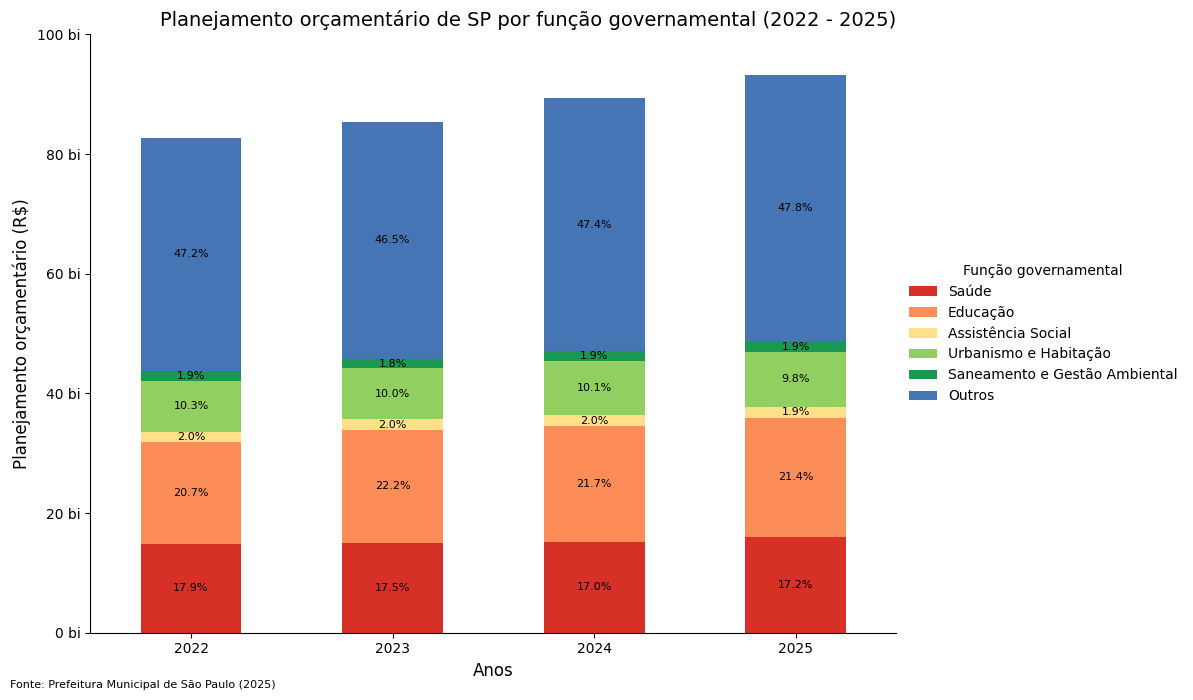

In [14]:
fig, ax = plt.subplots(figsize = (12, 7))

df_ppa_fonte_grafico1.plot(kind = "bar", 
                           stacked = True, 
                           ax = ax, 
                           color = ["#d73027",
                                    "#fc8d59", 
                                    "#fee08b", 
                                    "#91cf60", 
                                    "#1a9850", 
                                    "#4575b4"])

for i, coluna in enumerate(df_ppa_fonte_grafico1.columns):
    acumulado = df_ppa_fonte_grafico1.iloc[:, :i].sum(axis = 1)
    for j, (valor, perc) in enumerate(zip(df_ppa_fonte_grafico1[coluna], df_percentual[coluna])):
        if valor > 0:
            ax.text(j, 
                    acumulado.iloc[j] + valor / 2, 
                    f"{perc:.1f}%", 
                    ha = "center", 
                    va = "center", 
                    fontsize = 8)

ax.set_title("Planejamento orçamentário de SP por função governamental (2022 - 2025)", loc = "right", fontsize = 14)

ax.set_ylabel("Planejamento orçamentário (R$)", fontsize = 12)

ax.set_xlabel("Anos", fontsize = 12)

ax.set_xticks(range(len(df_ppa_fonte_grafico1.index)))

ax.set_xticklabels(df_ppa_fonte_grafico1.index, rotation = 0)

ax.legend(title = "Função governamental", bbox_to_anchor = (1, 0.5), loc = "center left", frameon = False)

ax.spines["top"].set_visible(False)

ax.spines["right"].set_visible(False)

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e9:.0f} bi'))

plt.ylim(0, 100e9)

plt.figtext(0.01, 0.01, "Fonte: Prefeitura Municipal de São Paulo (2025)", ha = "left", fontsize = 8)

plt.tight_layout()

plt.show()

save_graph(fig, "ppa_funcao_barras.png")